# Action primitives from in-game data


### Consider the 3D location data in file `q3dm1-path1.csv`.


#### Given the sequence

$$ x[1] : x[2] : x[3] : x[4] : · · · : x[n]$$

#### of subsequent 3D locations contained in that data file, compute a sequence

$$v[1] : v[2] : v[3] : v[4] : · · · : v[n − 1]$$

#### of velocity vectors where

$$v[t] = x[t + 1] − x[t]$$

#### Given this sequence of velocity vectors, compute their average.

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import time
import numpy.random as rnd

(3, 1327)
[24.125 24.125 24.125 ... 24.125 24.125 24.125]
[[ -2.4117  -7.5905 -15.2423 ...  -5.5109  -5.2723  -2.8207]
 [ -0.1123  -0.31    -0.5866 ...   0.4232   0.3545   0.2132]
 [  0.       0.       0.     ...   0.       0.       0.    ]]


<IPython.core.display.Javascript object>


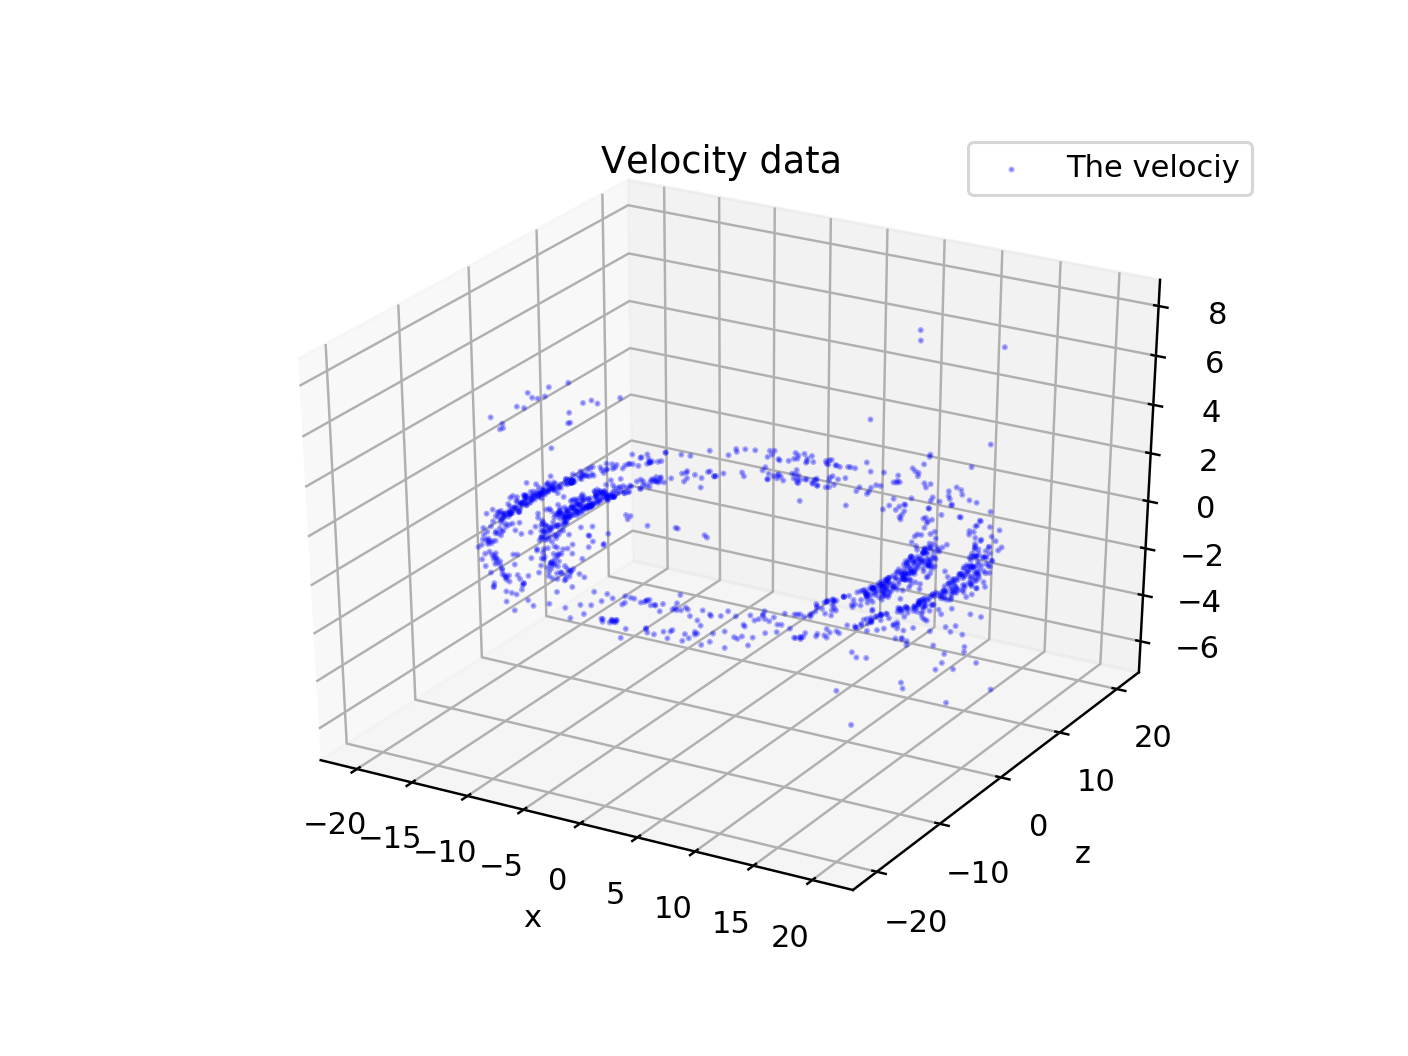

Shape of the velocity matrix (3, 1326)
For velocities the correct mean E[v]=  [0.0041 0.0165 0.    ]


In [16]:
### compute the velocities in matV with "q3dm1-path1.csv"

x = []
y = []
z = []

with open("q3dm1-path1.csv",'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))
        z.append(float(row[2]))

data = np.vstack((x,y,z))
matX = data 
print(matX.shape)
m, n = matX.shape
print(matX[2])
matV = matX[:, 1:n] - matX[:, 0:(n-1)]
print(matV)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(matV[0, :] , matV[1, :], matV[2, :], color = "blue", alpha=0.3, s= 1, label='The velociy')
print("Shape of the velocity matrix", matV.shape)
print("For velocities the correct mean E[v]= ", np.round(np.sum(matV, axis = 1)/(n-1), decimals = 4))
#ax.scatter(matX[0, :] , matX[1, :], matX[2, :], color = "black", alpha=0.3, s= 1, label='The coordinate')
plt.xlabel('x')
plt.ylabel('y')
plt.ylabel('z')
plt.title('Velocity data')
plt.legend()
plt.show()

### Run k-means clustering on the velocity vectors $v[t]$ to determine representative velocities or action primitives $a_1,a_2,...,a_k$. For k = 9, compute the average. Consider the kA resulting cluster centroids to be the action primitives $a_i$.

In [17]:
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
from numpy import random
from scipy.spatial import distance

#number of cluster centers 9
cluster_number = 9

# check the k means
centers, _ = kmeans(matV.T, cluster_number)
print(centers.shape)

(9, 3)


<IPython.core.display.Javascript object>


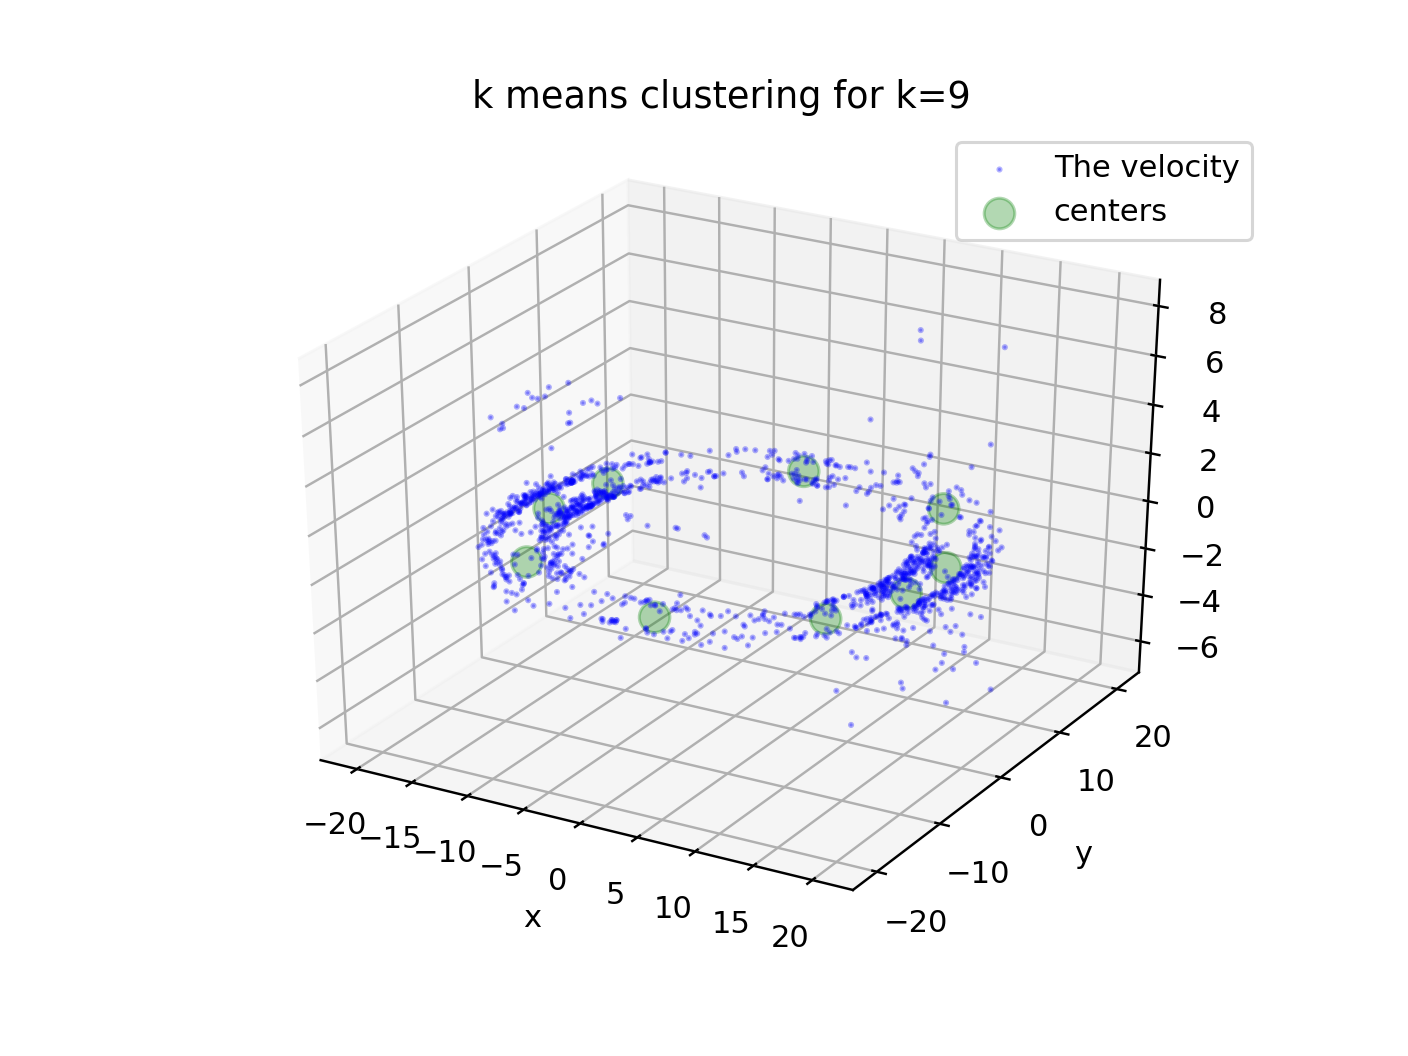

[[-1.17445852e+01 -1.14180981e+01 -2.21296296e-04]
 [-1.59547853e+01 -1.14827518e+00  2.88848921e-02]
 [ 1.60210564e+01  4.23067204e+00 -1.13374882e-01]
 [ 1.33175090e+01 -9.82550100e+00  1.47180000e-02]
 [-1.49223682e+01  6.07968000e+00 -4.14482051e-02]
 [ 1.12903218e+01  1.27966109e+01  3.63565455e-01]
 [ 2.15569342e+00 -1.59688803e+01  0.00000000e+00]
 [ 1.61175886e+01 -2.36459190e+00  1.20500000e-02]
 [-2.82336774e+00  1.59671280e+01  0.00000000e+00]]


In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.ion()

fig.show()
fig.canvas.draw()

ax.scatter(matV[0,:], matV[1,:], matV[2,:], color = "blue", alpha=0.3, s= 1,  label='The velocity')
ax.scatter(centers[:,0], centers[:,1], centers[:,2], color = "green", s= 100, alpha=0.3, label='centers')
plt.xlabel('x')
plt.ylabel('y')
plt.title('k means clustering for k=' + str(cluster_number))
plt.legend()
fig.canvas.draw()

print(centers)

In [19]:
### calculate the average of action primitives:

print(np.sum(centers[:,2]))
action_primitives = 1/cluster_number * np.sum(centers, axis = 0)
print("mean for action primitives", np.round(action_primitives, decimals = 4))


0.26417396369069635
mean for action primitives [ 1.4952 -0.1835  0.0294]


In [20]:
def oscillations():
    ww=[]
    
    # check the difference with the growth of k
    
    for k in np.arange(1326)+1:
    
        centers, _ = kmeans2(matV.T, k)
        action_primitives = 1/k * np.sum(centers, axis = 0)
        velocity = np.sum(matV, axis = 1)/(n-1)
        ww.append(distance.euclidean(action_primitives, velocity)**2)
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()

    fig.show()
    fig.canvas.draw()
    print(len(ww), np.arange(1326).shape)
    ax.plot(np.arange(1326), ww)

<IPython.core.display.Javascript object>


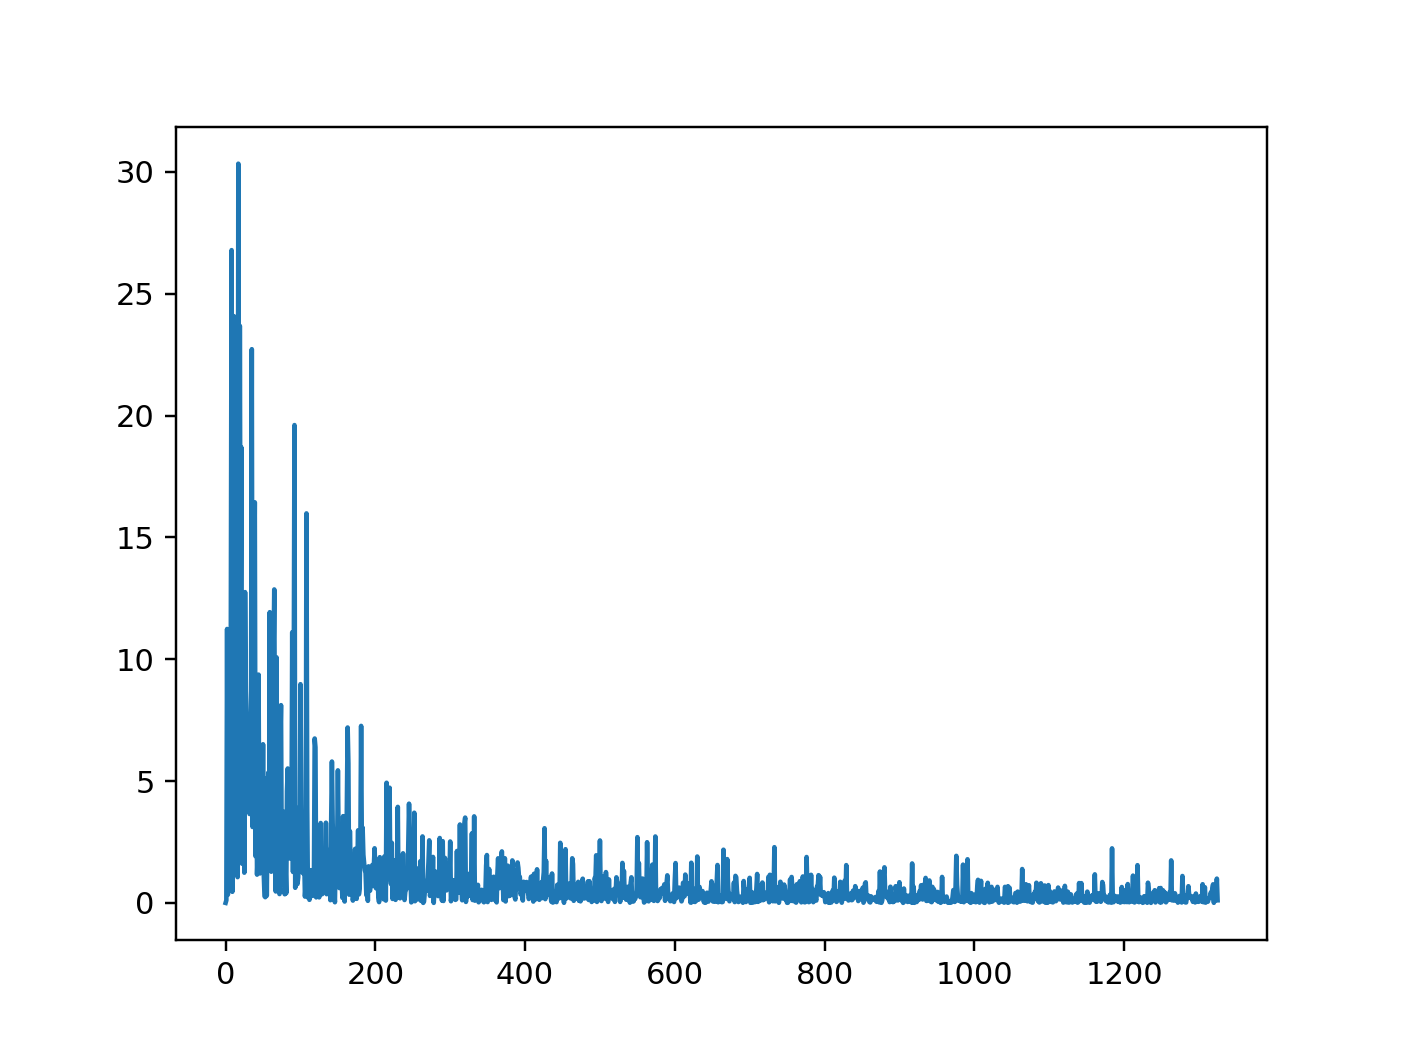

1326 (1326,)


In [21]:
oscillations()

- On the example of the plot we can see that the $$\| E[v]−E[a] \|^2$$ is not necessarily decreasing with the growth of the number of the clusters. 

- Indeed, the general ”trend” shows, that with the growth of number of centers the $$\| E[v]−E[a] \|^2$$ tends to decrease. 

- However, it is not happening consistently (as can be observed on the plot) as k-means result is a local optimization that heavily depends on the initialization. 

- Hence, it would be useful in practice to re-run the algorithm multiple times with the random initialization or even use the more exquisite version of random initialization, i.e. k-means++.